# EDA
본 노트에서는 자연어처리 데이터를 마주했을 때 해야하는 탐색적 분석 중 하나인 `문장 당 평균 token의 개수`를 계산해봅니다. 이 정보는 **딥러닝 모형 학습 시 mini-batch 구성을 위한 정보로 활용합니다.** 

### Setup

In [1]:
import pandas as pd
from pathlib import Path
from pprint import pprint

### Load dataset

In [2]:
data_dir = Path.cwd() / 'data'
list_of_dataset = list(data_dir.iterdir())
pprint(list_of_dataset)

[PosixPath('/root/Documents/archive/strnlp/exercise/data/.DS_Store'),
 PosixPath('/root/Documents/archive/strnlp/exercise/data/train.txt'),
 PosixPath('/root/Documents/archive/strnlp/exercise/data/validation.txt'),
 PosixPath('/root/Documents/archive/strnlp/exercise/data/test.txt')]


In [5]:
tr_dataset = pd.read_csv(list_of_dataset[1], sep='\t')
tr_dataset.head()

,document,label
0,애들 욕하지마라 지들은 뭐 그렇게 잘났나? 솔까 거기 나오는 귀여운 애들이 당신들보...,1
1,여전히 반복되고 있는 80년대 한국 멜로 영화의 유치함.,0
2,쉐임리스 스티브와 피오나가 손오공 부르마로 ㅋㅋㅋ,0
3,0점은 없나요?...,0
4,제발 시즌2 ㅜㅜ,1


### Define split_fn
token의 집합인 Vocaburary 구성을 위해, 문장을 sequence of tokens의 형태로 split하는 function인 `split_fn`을 작성, **split_fn을 어떻게 작성하느냐에 따라 문장이 sequence of tokens으로의 변형이 달라지고, Vocaburary도 달라짐**

In [6]:
# 문장을 어절기준으로 보는 split_fn을 작성
def split_eojeol(s):
    return s.split(' ')

split_eojeol(tr_dataset['document'][0])

['애들',
 '욕하지마라',
 '지들은',
 '뭐',
 '그렇게',
 '잘났나?',
 '솔까',
 '거기',
 '나오는',
 '귀여운',
 '애들이',
 '당신들보다',
 '훨',
 '낮다.']

### Calculate length per sentence

In [13]:
length_of_sentence = tr_dataset['document'].apply(lambda sen: len(split_eojeol(sen)))

count    119996.000000
mean          7.574961
std           6.507011
min           1.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          41.000000
Name: document, dtype: float64

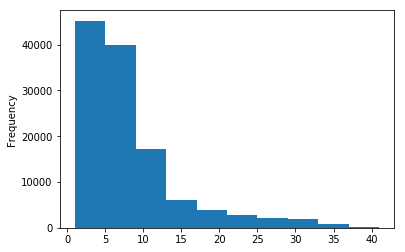

In [21]:
length_of_sentence.plot(kind='hist')
length_of_sentence.describe()